## Linear regression and regularization
This is a subset of a UCI dataset that contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
 - [Dataset info](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)
 
Our task will be to predict the number of bikes rented in a given day.
 
### Data description
 - season: 1 - spring, 2 - summer, 3 - fall, 4 - winter
 - yr: 0 - 2011, 1 - 2012
 - mnth: Month, from 1  to 12
 - holiday: 0 - not a holiday, 1 - holiday
 - weekday: Day of the week, from 0 to 6
 - workingday: 0 - non working day, 1 - working day
 - weathersit: weather from 1 (clear day) to 4 (heavy rain)
 - temp: Temperature (degrees Celsius)
 - atemp: "Feels like" temperature
 - hum: Humididty
 - windspeed(mph)
 - windspeed(ms)
 - cnt: number of bikes rented this day

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv('bikes_rent.csv')

In [8]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


#### Explore the dataset and look at the different features and their distributions

### Correlations
Let's explore the
[corellation coefficients](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
between different features. The `df.corr()` function computes correlation coefficients between all paris of columns in the dataframe. `df.corrwith(other_df)` works similarly, but pairs up columns from one df with columns from the other.

In [11]:
# Look at correlation coefficients between the target column cnt and all other colunns
df.corrwith(df.cnt).sort_values()

weathersit       -0.297391
windspeed(ms)    -0.234545
windspeed(mph)   -0.234545
hum              -0.100659
holiday          -0.068348
workingday        0.061156
weekday           0.067443
mnth              0.279977
season            0.406100
yr                0.566710
temp              0.627494
atemp             0.631066
cnt               1.000000
dtype: float64

In [14]:
# All column pairs, rounding all numbers to 2 decimal places
df.corr().round(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.00,-0.00,0.83,-0.01,-0.00,0.01,0.02,0.33,0.34,0.21,-0.23,-0.23,0.41
yr,-0.00,1.00,-0.00,0.01,-0.01,-0.00,-0.05,0.05,0.05,-0.11,-0.01,-0.01,0.57
mnth,0.83,-0.00,1.00,0.02,0.01,-0.01,0.04,0.22,0.23,0.22,-0.21,-0.21,0.28
holiday,-0.01,0.01,0.02,1.00,-0.10,-0.25,-0.03,-0.03,-0.03,-0.02,0.01,0.01,-0.07
weekday,-0.00,-0.01,0.01,-0.10,1.00,0.04,0.03,-0.00,-0.01,-0.05,0.01,0.01,0.07
workingday,0.01,-0.00,-0.01,-0.25,0.04,1.00,0.06,0.05,0.05,0.02,-0.02,-0.02,0.06
weathersit,0.02,-0.05,0.04,-0.03,0.03,0.06,1.00,-0.12,-0.12,0.59,0.04,0.04,-0.30
temp,0.33,0.05,0.22,-0.03,-0.00,0.05,-0.12,1.00,0.99,0.13,-0.16,-0.16,0.63
atemp,0.34,0.05,0.23,-0.03,-0.01,0.05,-0.12,0.99,1.00,0.14,-0.18,-0.18,0.63
hum,0.21,-0.11,0.22,-0.02,-0.05,0.02,0.59,0.13,0.14,1.00,-0.25,-0.25,-0.10


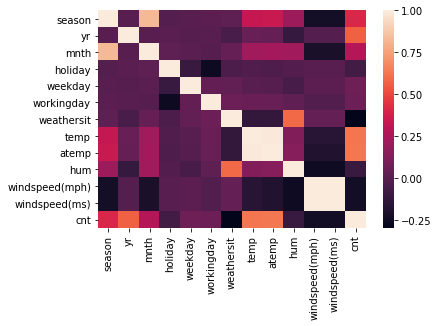

In [6]:
# The table above is a bit difficult to look at, so let's display it as a heatmap
sns.heatmap(df.corr())
# Alternatively use
# plt.imshow(df.corr())

#### We obviously have values of 1 on the diagonal, but note the twho bright squares with values of (nearly) 1 off the diagonal. Waht are the parameters that are so closely related to each other?

#### Plot scatter plots for `cnt` as a function of each of the columns

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [27]:
X = df.drop('cnt', 1)
y = df.cnt

In [26]:
reg.fit(df.drop('cnt', 1), df.cnt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
reg.coef_

array([ 5.14272760e+02,  2.04393657e+03, -4.09626297e+01, -5.19382139e+02,
        6.84956199e+01,  1.21294904e+02, -6.06457814e+02,  4.89961241e+01,
        7.19143633e+01, -1.02303900e+01,  2.40068322e+12, -5.37032837e+12])

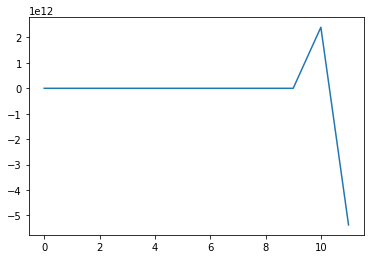

In [25]:
plt.plot(reg.coef_)

In [28]:
y_pred = reg.predict(X)

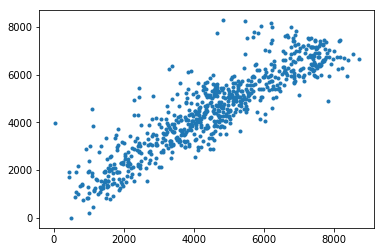

In [31]:
plt.plot(y, y_pred, '.')

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler